In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
pd.set_option('display.max_columns', None) ## 변수 77개... 너무 많은 느낌! 차원 축소 필요

In [3]:
raw = pd.read_csv('./eda2.csv', index_col=0)
raw.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Education_Level,Years_Customer,Days_Customer
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,25,1,0,0,Graduate,2,971
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,6,0,0,2,Graduate,0,125
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,21,0,1,0,Graduate,1,472
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,8,0,1,1,Graduate,0,65
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,19,0,1,1,Postgraduate,0,321


# K-means clusturing - pca 전

In [14]:
cate_var = raw[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Complain","Response","Partner","Education_Level"]]
cate_var = cate_var.reset_index()
no_pca = pd.concat([cate_var, scaled_df], axis=1).drop(columns=['index'])
no_pca.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Partner,Education_Level,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Years_Customer,Days_Customer
0,0,0,0,0,0,0,1,0,Graduate,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,1.679323,1.328161,0.614920,-1.266589,1.498307,1.974128
1,0,0,0,0,0,0,0,0,Graduate,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-0.963897,-1.167390,-0.503808,1.403420,-1.417639,-1.664957
2,0,0,0,0,0,0,0,1,Graduate,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,0.281242,0.802782,-0.503808,-1.266589,0.040334,-0.172330
3,0,0,0,0,0,0,0,1,Graduate,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-0.920675,-0.904700,-0.503808,0.068415,-1.417639,-1.923048
4,0,0,0,0,0,0,0,1,Postgraduate,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.307248,0.540092,-0.503808,0.068415,-1.417639,-0.821859


In [10]:
dums = pd.get_dummies(no_pca, drop_first=True)

### elbow method

Text(0, 0.5, 'WSS')

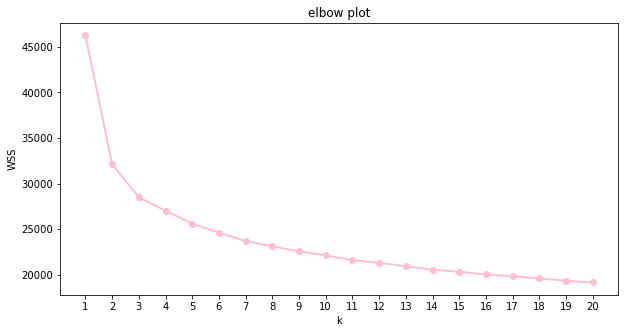

In [15]:
plt.figure(figsize=(10,5))
elb_df = pd.DataFrame(calculate_WSS(dums, 20),index=np.arange(20)+1)
plt.plot(elb_df, 'o-', linewidth=2, color='pink')
plt.title("elbow plot")
plt.xlabel("k")
plt.xticks(np.arange(20)+1)
plt.ylabel("WSS")

### silhouette method

In [16]:
sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(dums)
  labels = kmeans.labels_
  sil.append(silhouette_score(dums, labels, metric = 'euclidean'))

sil_df = pd.DataFrame(sil,index=np.arange(19)+2)

Text(0, 0.5, 'silhouette score')

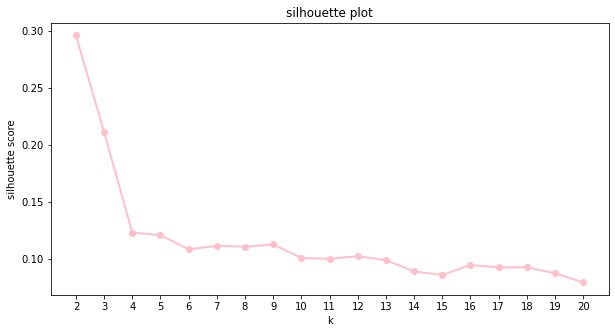

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sil_df, 'o-', linewidth=2, color='pink')
plt.title("silhouette plot")
plt.xlabel("k")
plt.xticks(np.arange(19)+2)
plt.ylabel("silhouette score")

<span style='background-color:#fffb51'>이 또한 K=2일 때 최적, 최소 k=3이여야 함</span>

In [18]:
from sklearn.cluster import KMeans
 
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(dums)

k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_centers : ', k_means_cluster_centers)



k_means_labels :  [2 1 0 ... 2 0 1]
k_means_cluster_centers :  [[ 3.13531353e-02  1.65016502e-02  6.60066007e-02  1.23762376e-01
   1.81518152e-02  8.25082508e-03  1.30363036e-01  6.58415842e-01
   2.31692723e-01 -3.44286962e-02  4.09391290e-01 -1.18666286e-01
  -1.60541777e-01 -1.66256746e-01 -1.30331206e-01  2.87936246e-01
   8.54162136e-01  8.20612388e-01  9.96210536e-02  5.57974783e-01
   2.65204892e-01  3.14294610e-01  1.64380412e-01  7.80674148e-01
  -7.18240367e-02  3.26163605e-01  3.31447380e-01  3.16992579e-01
   4.66996700e-01  6.60066007e-02]
 [ 9.92063492e-04  1.98412698e-03  7.24206349e-02  1.28968254e-02
   1.80411242e-16  1.09126984e-02  8.63095238e-02  6.50793651e-01
  -8.23067791e-01  5.85991048e-03 -7.88150040e-01 -5.40519304e-01
  -6.58344682e-01 -5.61884552e-01 -5.35930349e-01 -5.60271708e-01
  -1.96191748e-01 -7.49805236e-01 -7.49013249e-01 -8.06299272e-01
   4.35532769e-01 -2.18657890e-01 -8.52140459e-01 -9.36624549e-01
  -3.08474643e-01  3.58460833e-01 -1.9687595

In [19]:
dums['label'] = k_means.labels_
dums.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Partner,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Years_Customer,Days_Customer,Education_Level_Postgraduate,Education_Level_Undergraduate,label
0,0,0,0,0,0,0,1,0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,1.679323,1.328161,0.614920,-1.266589,1.498307,1.974128,0,0,2
1,0,0,0,0,0,0,0,0,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-0.963897,-1.167390,-0.503808,1.403420,-1.417639,-1.664957,0,0,1
2,0,0,0,0,0,0,0,1,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,0.281242,0.802782,-0.503808,-1.266589,0.040334,-0.172330,0,0,0
3,0,0,0,0,0,0,0,1,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-0.920675,-0.904700,-0.503808,0.068415,-1.417639,-1.923048,0,0,1
4,0,0,0,0,0,0,0,1,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.307248,0.540092,-0.503808,0.068415,-1.417639,-0.821859,1,0,0


### 1차원 분석

### BY 수익, 총 구매건수, 총 지출액수

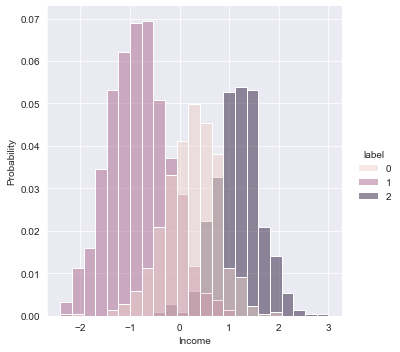

In [20]:
# Income에 따른 클래스 분포
sns.set_style("darkgrid")
sns.displot(dums, x="Income", hue="label", stat="probability")

<span style='background-color:#fffb51'>Income만 봤을 때, 저소득층:1, 중산층:0, 고소득층:2 이긴 한데, 겹치는 부분 꽤 있음. </span>  

아 그리고 사람들마다 라벨링 0,1,2가 다르니까 저,중,고소득층 이렇게라든지 클래스명을 따로 정해놧음 좋겟음

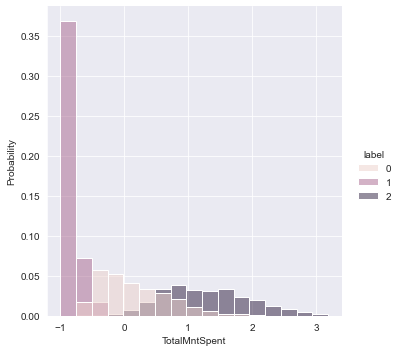

In [21]:
sns.set_style("darkgrid")
sns.displot(dums, x="TotalMntSpent", hue="label", stat="probability") # 제품에 지출한 총액


<span style='background-color:#fffb51'>저소득층:1, 중산층:0, 고소득층:2 이었는데, 제품에 지출한 총액 : 1<0<2 가 확연이 보임</span>  

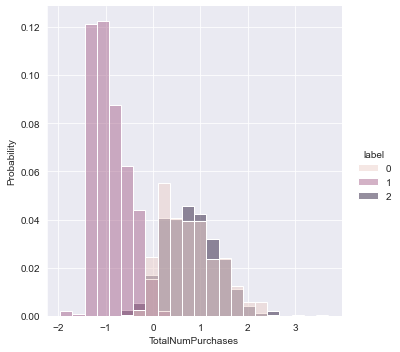

In [53]:
sns.set_style("darkgrid")
sns.displot(dums, x="TotalNumPurchases", hue="label", stat="probability") # 총 구매건수

<span style='background-color:#fffb51'>하지만, 총 구매건수를 보면 1은 확연히 차이가 나지만 0,2는 걍 겹침. 즉, 0과 2는 비슷하게 사지만 2은 한 번 살 때 비교적 더 많이, 더 비싼 품목을 구매할 가능성이 높다 </span>  

### BY 품목별 구매

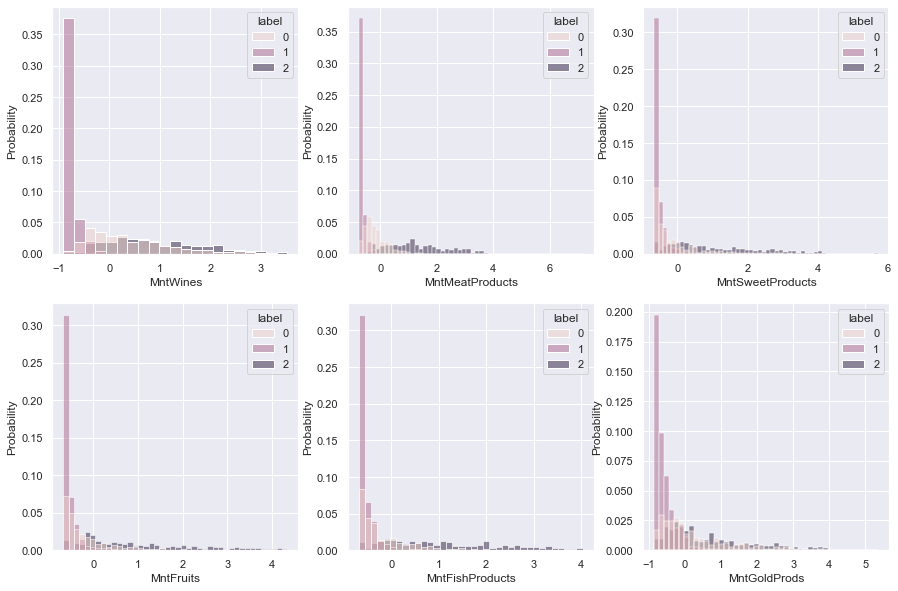

In [96]:
sns.set(rc = {'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 3)
col = [['MntWines', 'MntFruits'], ['MntMeatProducts', 'MntFishProducts'],
       ['MntSweetProducts', 'MntGoldProds']]
for i in range(2):
    for j in range(3):
        sns.histplot( dums, x = col[j][i],hue="label", stat="probability",ax=axes[i,j])

<span style='background-color:#fffb51'>저소득층이었던 1이 확연하게 제품들을 적게 구매함.
0,2는 비슷비슷하지만 고소득층인 2가 더 많이 구매하는 경향</span>  

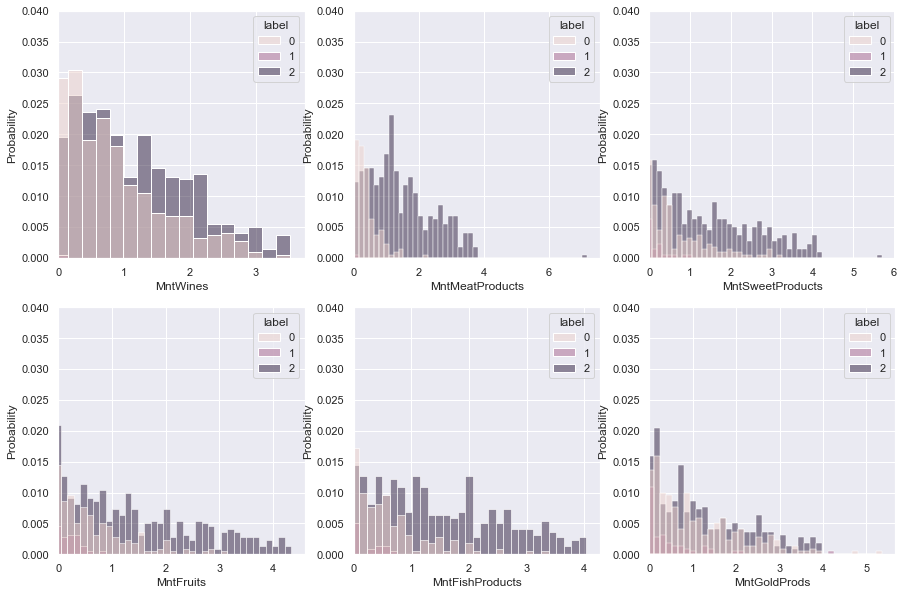

In [102]:
# 1이 너무 커서 0,2 클래스만 자세히 보기 위해 x,y축 범위 조정

sns.set(rc = {'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 3)
col = [['MntWines', 'MntFruits'], ['MntMeatProducts', 'MntFishProducts'],
       ['MntSweetProducts', 'MntGoldProds']]
for i in range(2):
    for j in range(3):
        g=sns.histplot( dums, x = col[j][i],hue="label", stat="probability",ax=axes[i,j])
        g.set(xlim=(0, None))
        g.set(ylim=(None,0.04))

<span style='background-color:#fffb51'>Meat, Sweet, Fruit, Fish에서 0,2의 구매 차이가 꽤 남</span>  

### BY 구매방법

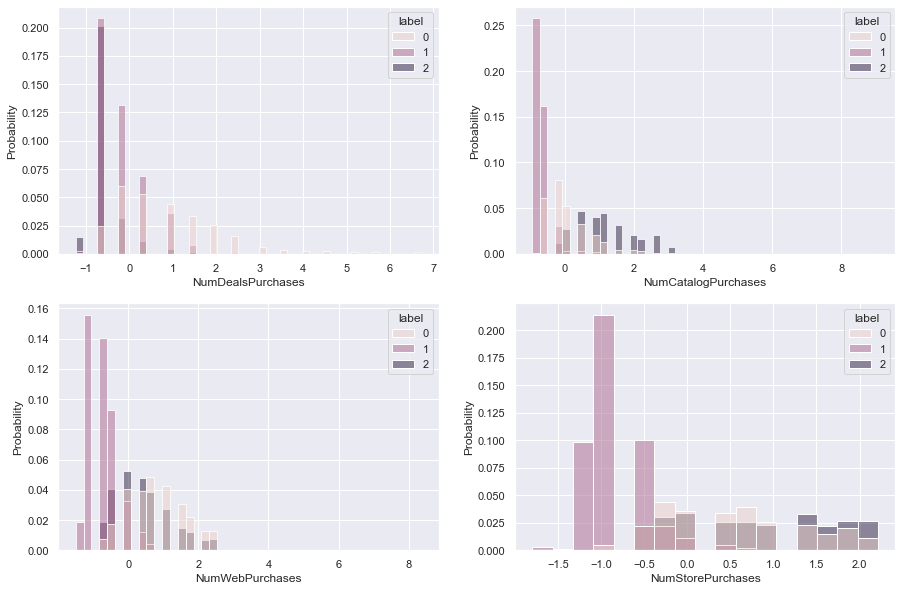

In [104]:
sns.set(rc = {'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 2)
col = [['NumDealsPurchases','NumWebPurchases'], ['NumCatalogPurchases', 'NumStorePurchases'],
       ['NumStorePurchases','NumWebVisitsMonth']]
for i in range(2):
    for j in range(2):
        sns.histplot( dums, x = col[j][i],hue="label", stat="probability",ax=axes[i,j])

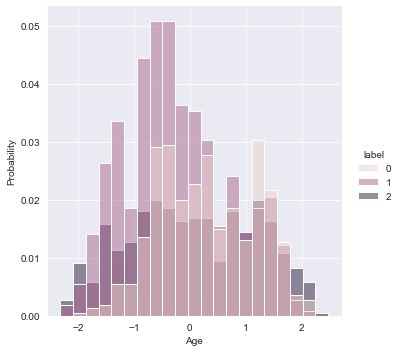

In [27]:
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.displot(dums, x="Age", hue="label", stat="probability")


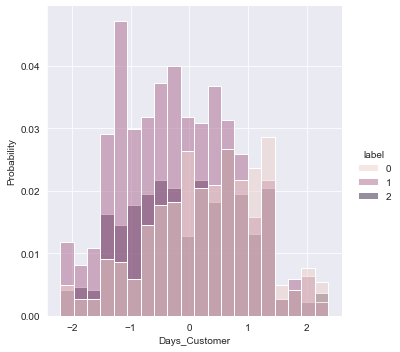

In [28]:
sns.set_style("darkgrid")
sns.displot(dums, x="Days_Customer", hue="label", stat="probability")


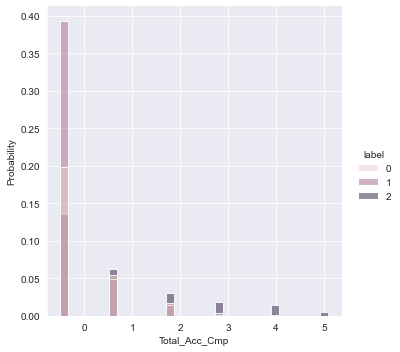

In [29]:
sns.set_style("darkgrid")
sns.displot(dums, x="Total_Acc_Cmp", hue="label", stat="probability")


<span style='background-color:#fffb51'>잘 구별이 안 됨</span>  

### 2차원 분석

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


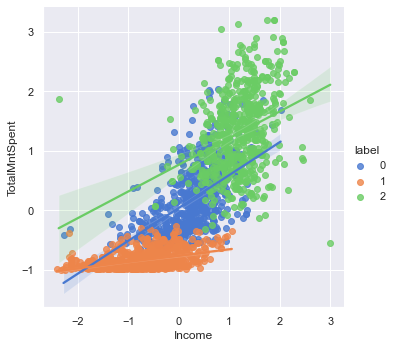

In [105]:
## 총 지출액수
sns.set_palette("muted")
sns.lmplot('Income','TotalMntSpent',data=dums,hue='label')

/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


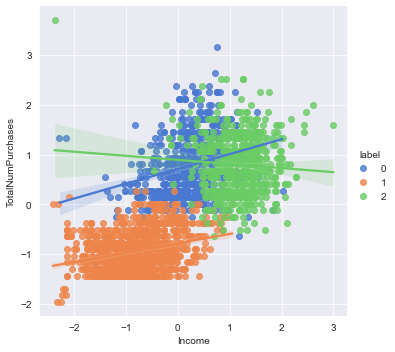

In [30]:
## 총 구매건수
sns.set_palette("muted")
sns.lmplot('Income','TotalNumPurchases',data=dums,hue='label')

### Income별 각 품목 지출액

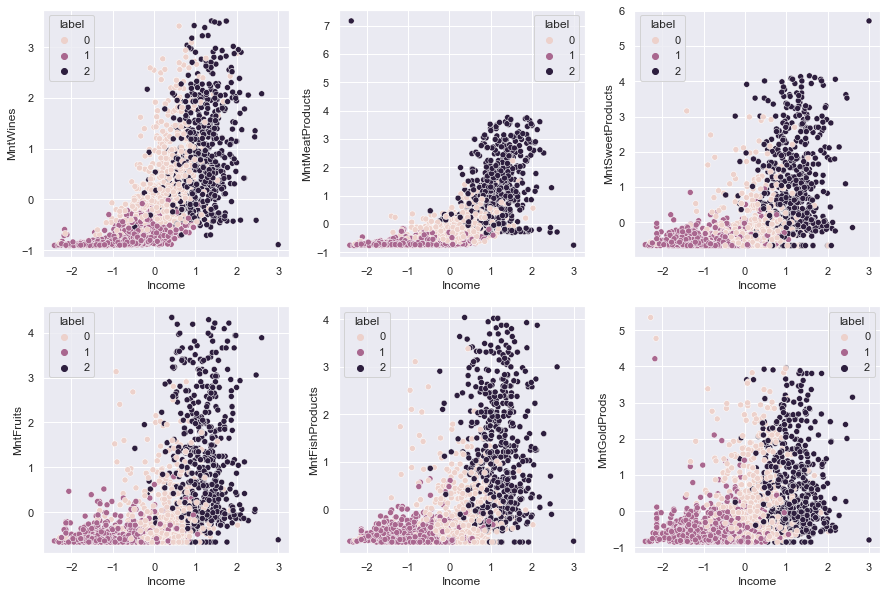

In [109]:
sns.set(rc = {'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 3)
col = [['MntWines', 'MntFruits'], ['MntMeatProducts', 'MntFishProducts'],
       ['MntSweetProducts', 'MntGoldProds']]
for i in range(2):
    for j in range(3):
        #sns.histplot( dums, x = col[j][i],hue="label", stat="probability",ax=axes[i,j])
        sns.scatterplot(x='Income',y=col[j][i],data=dums,hue='label',ax=axes[i,j])

<span style='background-color:#fffb51'>클래스0은 클래스2보다 Income이 더 적음에도 지출액이 비슷함. 클래스0은 Income에 비해서 지출을 좀 많이 하는 편?</span>  

### 총 구매건수 별 각 품목 지출액

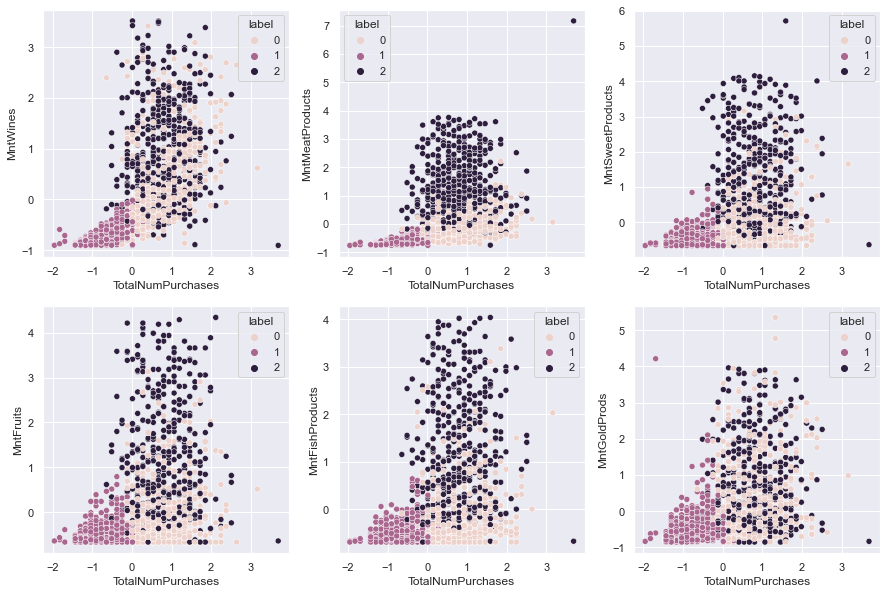

In [110]:
sns.set(rc = {'figure.figsize':(15,10)})
fig, axes = plt.subplots(2, 3)
col = [['MntWines', 'MntFruits'], ['MntMeatProducts', 'MntFishProducts'],
       ['MntSweetProducts', 'MntGoldProds']]
for i in range(2):
    for j in range(3):
        #sns.histplot( dums, x = col[j][i],hue="label", stat="probability",ax=axes[i,j])
        sns.scatterplot(x='TotalNumPurchases',y=col[j][i],data=dums,hue='label',ax=axes[i,j])

<span style='background-color:#fffb51'>1차원 분석 때 0과 2는 비슷하게 사지만 2은 한 번 살 때 비교적 더 많이, 더 비싼 품목을 구매할 가능성이 높다고 했는데,,,,
오 확실히 총 구매건수는 같음에도 클래스2가 한 번 살 때 더 많이, 더 비싼 걸 구매함!! 특히 Meat, Sweet, Fruit, Fish에서</span>  

In [44]:
# 부모여부에 따른 클래스 분포

tb2 = pd.crosstab(dums.Children, dums.label)
tb2.index = [0,1,2,3]
tb2

label,0,1,2
0,48,127,453
1,410,568,134
2,131,280,4
3,17,33,0


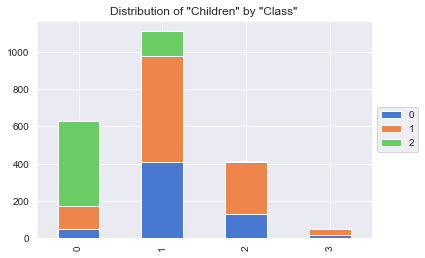

<Figure size 216x360 with 0 Axes>

In [48]:
ax = tb2.plot(kind='bar', stacked=True)
plt.title('Distribution of "Children" by "Class"')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(3,5))

plt.show()

<span style='background-color:#fffb51'>자식이 없으면 클래스2(고소득)인 경우가 대다수고, 자식이 있는 경우는 클래스 1,0</span>  


/Users/JAE111/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


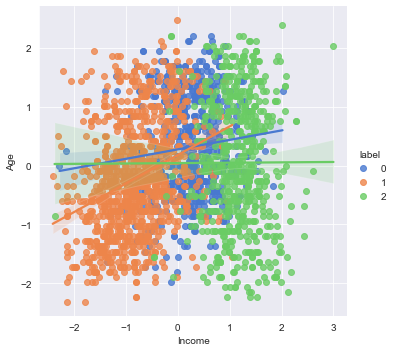

In [47]:
sns.set_palette("muted")
sns.lmplot('Income','Age',data=dums,hue='label')

# 예측결과

수입별로, 1:저소득층 < 0:중산층 < 2:고소득층

클래스 1은  구매건수와 총 구매액수도 현저히 적다.  

클래스 0,2는 겹치는 부분이 꽤 있었는데
클래스 0와 2는 총 구매 건수가 비슷한데 반해, 총 지출액에선 0 < 2 가 확연하게 보였다.  
따라서, 2는 0에 비해서 한 번 살 때 더 많이, 더 비싼 품목을 구매할 가능성이 높아 보인다.  

이러한 특징을 마케팅에 적용한다면 클래스 1에게는 가성비 좋은 세일 품목을, 클래스 2에게는 프리미엄 상품들을 홍보하는 것이 옳다.  